Import Dependencies

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt

Import Dataset

In [2]:
dataset_maintenance_prediktif = fetch_ucirepo(id=601)

feature = dataset_maintenance_prediktif.data.features
target = dataset_maintenance_prediktif.data.targets

Data Understanding

In [3]:
feature.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


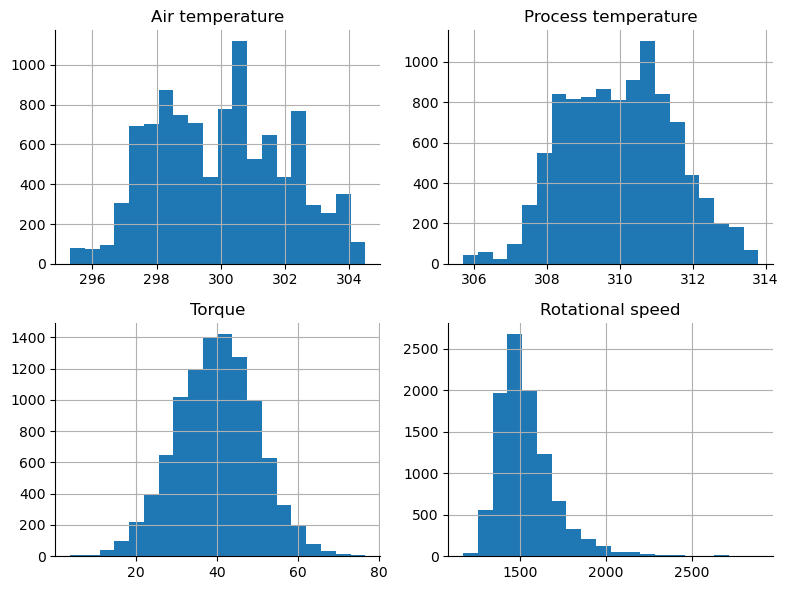

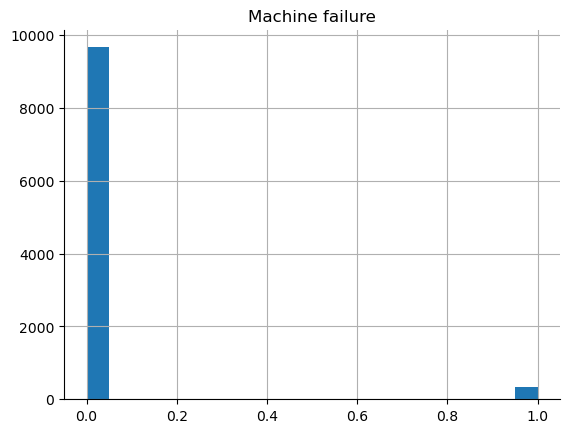

array([0, 1], dtype=int64)

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for idx, kolom in enumerate(['Air temperature', 'Process temperature', 'Torque', 'Rotational speed']):
    feature[kolom].hist(ax=axes[idx//2, idx%2], bins=20)
    axes[idx//2, idx%2].set_title(kolom)
    axes[idx//2, idx%2].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

feature.describe()

target.head()

target = target.drop(columns=['TWF','HDF','PWF','OSF','RNF'])
target.head()

target['Machine failure'].hist(bins=20)
plt.title('Machine failure')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

target["Machine failure"].unique()

One Hot Encoding

In [5]:
feature_encoded = pd.get_dummies(feature, columns=['Type'])
feature_encoded.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,False,False,True
1,298.2,308.7,1408,46.3,3,False,True,False
2,298.1,308.5,1498,49.4,5,False,True,False
3,298.2,308.6,1433,39.5,7,False,True,False
4,298.2,308.7,1408,40.0,9,False,True,False


Normalization

In [6]:
normalizer = StandardScaler()
feature_normalized = normalizer.fit_transform(feature_encoded)

feature_normalized_df = pd.DataFrame(feature_normalized, columns=feature_encoded.columns)
feature_normalized_df.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.333889,-1.224745,1.528617
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.333889,0.816497,-0.654186
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.333889,0.816497,-0.654186
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.333889,0.816497,-0.654186
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.333889,0.816497,-0.654186


Spliting Dataset

In [7]:
feature_train, feature_test, target_train, target_test = train_test_split(feature_normalized_df, target, test_size=0.2, random_state=42)

Train and Predict Model

In [8]:
classifier = LogisticRegression(random_state=0)
classifier.fit(feature_train, target_train)

prediksi = classifier.predict(feature_test)

c:\Users\raihan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Evaluation

In [9]:
akurasi = accuracy_score(target_test, prediksi)
print(f'Akurasi: {akurasi:.2f}')

matriks_konfusi = confusion_matrix(target_test, prediksi)
print('Matriks Konfusi:')
print(matriks_konfusi)

laporan_klasifikasi = classification_report(target_test, prediksi)
print('Laporan Klasifikasi:')
print(laporan_klasifikasi)

Akurasi: 0.97
Matriks Konfusi:
[[1931    8]
 [  45   16]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.67      0.26      0.38        61

    accuracy                           0.97      2000
   macro avg       0.82      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000

